# Data analysis

Our objectives are to:
    * analyse the data to better understand bike theft hotspots (location, month) and outcomes (suspect charged? no suspect identified?)
    * map the bike theft reports on a map!
    * colour the entries by outcome

## Summary analysis

By Naomi

### Step 1: import the data

Start by importing the local data. Resource used: [Python Crash Course by Eric Matthes](https://ehmatthes.github.io/pcc/)

In [82]:
import csv

#Note this method requires the csv to be in same directory as notebook
data = 'bikethefts.csv'

# from urllib.request import urlretrieve
# data = urlretrieve(
#            "https://github.com/open-data-day-cambridge-2018/bicycle-theft-cambridgeshire/blob/master/data/processed/bikethefts.csv"
# )
with open(data) as fname:
    reader = csv.reader(fname)
    header_row = next(reader)
    print(header_row) #This allows us to check the column titles are what we expect
    
    for index, column_header in enumerate(header_row):
        print(index, column_header) #This just prints the headers again but as a list with header number

['Crime ID', 'Month', 'Longitude', 'Latitude', 'Location', 'Last outcome category']
0 Crime ID
1 Month
2 Longitude
3 Latitude
4 Location
5 Last outcome category


Ideally download the data from github repo. Reference: https://gist.github.com/keum/6590282. Struggling with this, so .csv is available in the noteboks directory; clone repo to work locally.

We have imported the data as expected. Next, analyse it.

Useful things to analyse at first:
* Total number of crime reports (note all in this dataset are bike thefts)
* Distribution by month, location, outcome --> individual barplots

In [24]:
# Total number of crime reports in 2017 = number of rows. From visual inspection, this is 4,394.
with open(data) as fname:
    reader = csv.reader(fname)
    total = len(list(reader)) - 1 #note to reduce by 1 to remove column header row
    print(total)

4394


From this, I learnt I needed to have the whole loop of 'with ...:' as I first tried total = len(...) and the program did not understand the file to read.

Next, plot some barplots using matplotlib. Reference: https://towardsdatascience.com/5-quick-and-easy-data-visualizations-in-python-with-code-a2284bae952f
This will require manipulating the data in the csv, use Pandas: [cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

In [63]:
import pandas as pd
from pandas import DataFrame

df = pd.read_csv('bikethefts.csv')

# make a series that sums the frequency per month
monthCounts = df.Month.value_counts()
# turn series into dataframe and name the column headers
monthdf = pd.DataFrame({'Month':monthCounts.index, 'Frequency':monthCounts.values})
# check dataframe
print(monthdf)

    Frequency    Month
0         495  2017-06
1         468  2017-10
2         442  2017-05
3         432  2017-08
4         428  2017-07
5         385  2017-11
6         335  2017-09
7         331  2017-03
8         318  2017-04
9         264  2017-02
10        257  2017-12
11        239  2017-01


Now we plot these sum values using matplotlib barplot

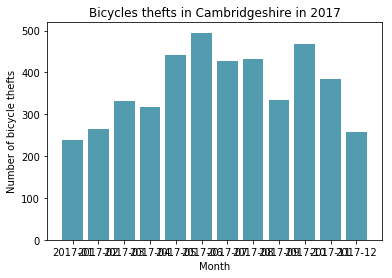

In [72]:
import matplotlib.pyplot as plt

x_data = monthdf.Month
y_data = monthdf.Frequency

def barplot(x_data, y_data, x_label="Month", y_label="Number of bicycle thefts", title="Bicycles thefts in Cambridgeshire in 2017"):
    fig, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    # ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

barplot(x_data,y_data)

Hurrah! But it's messy, so let's try to rename our months.

In [95]:
import pandas as pd
from pandas import DataFrame

df = pd.read_csv('bikethefts.csv')

# make a series that sums the frequency per month
monthCounts = df.Month.value_counts()
# turn series into dataframe
monthdf = pd.DataFrame({'Month':monthCounts.index, 'Frequency':monthCounts.values})

# make a dictionary to map current month values to month names    
di = {11: "Jan", 9: "Feb", 7: "Mar", 8: "Apr", 2: "May", 0: "Jun", 4: "Jul", 3 : "Aug", 6 : "Sep", 1: "Oct", 5: "Nov", 10 : "Dec"}
monthdf['Month'].update(pd.Series(di))

# check dataframe
print(monthdf)

    Frequency Month
0         495   Jun
1         468   Oct
2         442   May
3         432   Aug
4         428   Jul
5         385   Nov
6         335   Sep
7         331   Mar
8         318   Apr
9         264   Feb
10        257   Dec
11        239   Jan


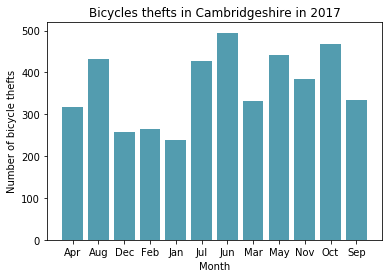

In [97]:
import matplotlib.pyplot as plt

x_data = monthdf.Month
y_data = monthdf.Frequency

barplot(x_data,y_data)

So we've managed to rename the months, but now our barplot is ordered alphabetically. We should probably try to map to recognised month values instead of our months as strings.

## Mapping the data

By Rachel and Yo